In [3]:
import numpy as np
import matplotlib.pyplot as plt

In der Datenstruktur geht es um veschiedere Wetterstationen in diesem Fall die Wetterstationen von `Bern`. 

Die Spaltennamen werden hier unten klar definiert. 


|  Header   |        Bedeutung        |  Einheit   |
| :-------: | :---------------------: | :--------: |
|    stn    |      Wetterstation      |     -      |
|   time    |       Zeitstempel       | `datetime` |
| prestah0  |        Luftdruck        |    hPa     |
| tre200h0  |       Temperatur        |     °C     |
| rre150h0  |       Regenmenge        |     mm     |
| su2000h0  |      Sonnenstunden      |     %      |
| time_diff | Stunden seit Messbeginn |     h      |

Schon am Anfang beginnen die ersten Probleme aufzutauchen, denn wie wir wissen fehlen gewisse Daten in der Datenstruktur. Um die möglichkeit frei zu behalten zu einem späteren Zeitpunkt fehlender Werte zu ergänzen oder zu filtern haben wir uns für die funktion `genfromtxt` entschieden, denn diese ermöglicht es uns fehlende Werte zu filtern oder zu ergänzen 

In [28]:
# Hier hat man genfromtxt() benutzt, um die Daten aus der CSV-Datei zu laden.
data = np.genfromtxt("Bern21-22.csv", delimiter=';', skip_header=1, dtype='str')

In einem nächsten Schritt werden die explizite Daten der Wetterstation in **Bern** gefiltert. Gleich danach wird das Array Transponiert um die Zugewiesenen Variablen den richtigen Spalten zuzuweisen. 

Eine reduktion von **52'324** auf **7464** Daten kann nach diesem Prozess beobachtet werden. Trotz der gefilterten Daten bleibt  die Zeilenanzahl enthalten. 


In [29]:
# Daten nach BER filtern
ber_data = data[np.char.startswith(data[:,0], "BER")]

# Variablen gemäss Aufgabenstellung zuweisen
stn, time, luftdruck, temp, regen, sonne, time_diff = ber_data.T

# shape und len() der Arrays ausgeben
print(f" Der ursprüngliche Datensatz betägt {data.shape}, {ber_data.shape}")
print(len(data),len(ber_data))

# Die ersten 5 Zeilen ausgeben
print(ber_data[:5])

 Der ursprüngliche Datensatz betägt (52324, 7), (7464, 7)
52324 7464
[['BER' '2021-11-01 00:00:00' '941.4' '7.2' '0.0' '0.0' '0.0']
 ['BER' '2021-11-01 01:00:00' '941.4' '7.5' '0.0' '0.0' '1.0']
 ['BER' '2021-11-01 02:00:00' '941.1' '8.3' '0.7' '0.0' '2.0']
 ['BER' '2021-11-01 04:00:00' '941.3' '9.6' '1.0' '0.0' '4.0']
 ['BER' '2021-11-01 06:00:00' '942.2' '9.6' '1.7' '0.0' '6.0']]


Jedoch wollen wir ersteinmal wissen, wieviele Daten, dass überhaupt fehlen, damit wir uns ein Bild machen können. Wir wissen, dass die Wetterdaten über ein Jahr gesammelt worden sind und dass ein Tag aus 24h besteht. 

In [6]:
datensätze = 365 * 24
unsere_datensätze = len(ber_data)
print(f"Es fehlen insgesammt {datensätze - unsere_datensätze} Datensätze")

Es fehlen insgesammt 1296 Datensätze


In [7]:
"""import pandas as pd
# Interpolationspunkte festlegen
x = ber_data["time_diff"]
y_cols = ["luftdruck", "Temp", "regen", "sonne"]

# Interpolation durchführen
interp_data = np.broadcast({"time_diff": np.arange(x.min(), x.max()+1)})
for col in y_cols:
    interp_func = np.interp(interp_data["time_diff"], x, data[col])
    interp_data[col] = interp_func

# Ergebnis ausgeben
print(interp_data)
"""

'import pandas as pd\n# Interpolationspunkte festlegen\nx = ber_data["time_diff"]\ny_cols = ["luftdruck", "Temp", "regen", "sonne"]\n\n# Interpolation durchführen\ninterp_data = np.broadcast({"time_diff": np.arange(x.min(), x.max()+1)})\nfor col in y_cols:\n    interp_func = np.interp(interp_data["time_diff"], x, data[col])\n    interp_data[col] = interp_func\n\n# Ergebnis ausgeben\nprint(interp_data)\n'

In [8]:
#BER;2021-11-01 00:00:00;941.4;7.2;0.0;0.0;0.0
#BER;2022-11-01 23:00:00;959.1;9.6;0.0;0.0;8783.0

Interpolation 

In [9]:
import numpy as np

def remove_ber(data):
    # entferne die Spalte "BER"
    updated_data = np.delete(data, 0, axis=1) & np.delete(data, 0, axis=2)
    return updated_data


# aktualisiertes Array ohne die Spalte "BER"
updated_data = remove_ber(ber_data)
# aktualisierte Spaltennamen ohne "BER"
updated_data[:, 2:] = updated_data[:, 2:].astype(float)


updated_data

array([['2021-11-01 00:00:00', '941.4', '7.2', '0.0', '0.0', '0.0'],
       ['2021-11-01 01:00:00', '941.4', '7.5', '0.0', '0.0', '1.0'],
       ['2021-11-01 02:00:00', '941.1', '8.3', '0.7', '0.0', '2.0'],
       ...,
       ['2022-11-01 21:00:00', '958.6', '11.1', '0.0', '0.0', '8781.0'],
       ['2022-11-01 22:00:00', '958.9', '10.0', '0.0', '0.0', '8782.0'],
       ['2022-11-01 23:00:00', '959.1', '9.6', '0.0', '0.0', '8783.0']],
      dtype='<U19')

In [10]:
import pandas as pd
def read_ber_data(filename):
    # Einlesen der CSV-Datei
    df = pd.read_csv(filename, header=None, sep=';')
    
    # Filtern nach Datensätzen mit Präfix "BER"
    df = df[df[0].str.startswith('BER')]
    
    # Spaltennamen zuweisen
    df.columns = ['Station', 'Datum', 'Druck', 'Temp', 'Regen', 'Schnee', 'Wind']
    
    return df


In [11]:
df = read_ber_data('Bern21-22.csv')

In [12]:
df

,Station,Datum,Druck,Temp,Regen,Schnee,Wind
7446,BER,2021-11-01 00:00:00,941.4,7.2,0.0,0.0,0.0
7447,BER,2021-11-01 01:00:00,941.4,7.5,0.0,0.0,1.0
7448,BER,2021-11-01 02:00:00,941.1,8.3,0.7,0.0,2.0
7449,BER,2021-11-01 04:00:00,941.3,9.6,1.0,0.0,4.0
7450,BER,2021-11-01 06:00:00,942.2,9.6,1.7,0.0,6.0
...,...,...,...,...,...,...,...
14905,BER,2022-11-01 18:00:00,958.1,11.1,0.0,0.0,8778.0
14906,BER,2022-11-01 19:00:00,958.3,10.9,0.0,0.0,8779.0
14907,BER,2022-11-01 21:00:00,958.6,11.1,0.0,0.0,8781.0
14908,BER,2022-11-01 22:00:00,958.9,10.0,0.0,0.0,8782.0


In [13]:

x = df.T

print(x)


                       7446                 7447                 7448   \
Station                  BER                  BER                  BER   
Datum    2021-11-01 00:00:00  2021-11-01 01:00:00  2021-11-01 02:00:00   
Druck                  941.4                941.4                941.1   
Temp                     7.2                  7.5                  8.3   
Regen                    0.0                  0.0                  0.7   
Schnee                   0.0                  0.0                  0.0   
Wind                     0.0                  1.0                  2.0   

                       7449                 7450                 7451   \
Station                  BER                  BER                  BER   
Datum    2021-11-01 04:00:00  2021-11-01 06:00:00  2021-11-01 07:00:00   
Druck                  941.3                942.2                943.1   
Temp                     9.6                  9.6                  9.4   
Regen                    1.0         

In [27]:
import numpy as np

def preprocess_data(data):
    # Entferne die Spalte "stn"
    bereinigte_daten = np.delete(data, 0, axis=1) & np.delete(data, 0, axis=1)
    
    # Konvertiere alle Spalten außer der ersten in float
    data[:, 1:] = data[:, 1:].astype(float)
    
    return bereinigte_daten
print(preprocess_data(ber_data))


TypeError: ufunc 'bitwise_and' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [23]:
# Daten nach BER filtern
#char macht aus den strings ein array
ber_data = data[np.char.startswith(data[:,0], "BER")]
filtered_data = np.delete(ber_data, [0, 1], axis=1)

print(filtered_data)

# Vorverarbeitete Daten
preprocessed_data = preprocess_data(ber_data)
print(preprocessed_data)
# Ausgabe der ersten 5 Zeilen
print(preprocessed_data[:5])

luftdruck = ber_data[:, 2]
temperaturen = ber_data[:, 3]

regen = ber_data[:, 4]
sonne = ber_data[:, 5]
time_diff = ber_data[:, 6]


luftdruck = luftdruck.astype(float)
temperaturen = temperaturen.astype(float)
regen = regen.astype(float)
sonne = sonne.astype(float)
time_diff = time_diff.astype(float)


print(temperaturen, regen, sonne, time_diff,luftdruck)

print(temperaturen)

[['941.4' '7.2' '0.0' '0.0' '0.0']
 ['941.4' '7.5' '0.0' '0.0' '1.0']
 ['941.1' '8.3' '0.7' '0.0' '2.0']
 ...
 ['958.6' '11.1' '0.0' '0.0' '8781.0']
 ['958.9' '10.0' '0.0' '0.0' '8782.0']
 ['959.1' '9.6' '0.0' '0.0' '8783.0']]
[['2021-11-01 00:00:00' '941.4' '7.2' '0.0' '0.0' '0.0']
 ['2021-11-01 01:00:00' '941.4' '7.5' '0.0' '0.0' '1.0']
 ['2021-11-01 02:00:00' '941.1' '8.3' '0.7' '0.0' '2.0']
 ...
 ['2022-11-01 21:00:00' '958.6' '11.1' '0.0' '0.0' '8781.0']
 ['2022-11-01 22:00:00' '958.9' '10.0' '0.0' '0.0' '8782.0']
 ['2022-11-01 23:00:00' '959.1' '9.6' '0.0' '0.0' '8783.0']]
[['2021-11-01 00:00:00' '941.4' '7.2' '0.0' '0.0' '0.0']
 ['2021-11-01 01:00:00' '941.4' '7.5' '0.0' '0.0' '1.0']
 ['2021-11-01 02:00:00' '941.1' '8.3' '0.7' '0.0' '2.0']
 ['2021-11-01 04:00:00' '941.3' '9.6' '1.0' '0.0' '4.0']
 ['2021-11-01 06:00:00' '942.2' '9.6' '1.7' '0.0' '6.0']]
[ 7.2  7.5  8.3 ... 11.1 10.   9.6] [0.  0.  0.7 ... 0.  0.  0. ] [0. 0. 0. ... 0. 0. 0.] [0.000e+00 1.000e+00 2.000e+00 ... 8.7

### hier ist ein anderer Ansatz mal probieren wie man die Daten filtern könnte 

In [ ]:
## anderer ansatz
data = np.genfromtxt("Bern21-22.csv", delimiter=';', skip_header=1, 
                     dtype=[('stn', 'U10'), ('time', 'datetime64[s]'), ('lufti', float),
                            ('tempi', float), ('regi', float), ('soni', float), 
                            ('timi', float)])


In [ ]:
for i in range(2, 7):
    ber_data[:, i] = ber_data[:, i].astype(float)


NameError: name 'ber_data' is not defined

In [ ]:
tempi= ber_data[:, 3]
lufti = ber_data[:, 2]
regi = ber_data[:, 4]
soni = ber_data[:, 5]
timi = ber_data[:, 6]
time = ber_data[:, 1]


In [ ]:
time = np.array(ber_data[:, 1], dtype='datetime64')

# Die erste und letzte Zeit finden
start_time = np.min(time)
end_time = np.max(time)

# Die Zeitspanne berechnen
time_span = end_time - start_time

print("Die Zeitspanne beträgt:", time_span)

Die Zeitspanne beträgt: 31618800 seconds


In [ ]:
import datetime
start_time = datetime.datetime.strptime("2023-04-05 00:00:00", "%Y-%m-%d %H:%M:%S")
end_time = datetime.datetime.strptime("2023-04-05 23:59:59", "%Y-%m-%d %H:%M:%S")
mask = (time >= start_time) & (time <= end_time)

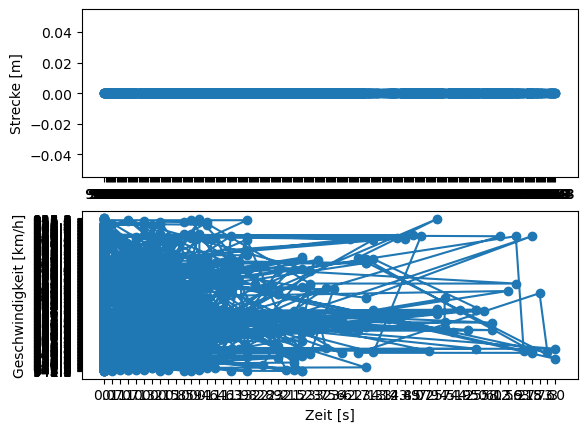

In [ ]:

fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(lufti,  mask , "o-")
ax1.set_ylabel("Strecke [m]")
ax2.plot(regi, lufti, "o-")
ax2.set_xlabel("Zeit [s]")
ax2.set_ylabel("Geschwindigkeit [km/h]")
plt.show()

In [ ]:
to = 9
i_upper = np.searchsorted(regi, to)
i_lower = i_upper - 1
delta_v = (lufti[i_upper] - lufti[i_lower])
delta_t = regi[i_upper] - regi[i_lower]
m = delta_v / delta_t
v0 = m * (to-lufti[i_lower]) + regi[i_lower]

IndexError: index 7464 is out of bounds for axis 0 with size 7464

In [16]:
#daten einlesen und nach Ber filtern sowie die erste und zweite zeile löschen 

import numpy as np

def daten_filtern():
    # Daten einlesen
    data = np.genfromtxt("Bern21-22.csv", delimiter=";", dtype=None, encoding=None)

    # Filtern nach erster Spalte
    filtered_data = data[data[:, 0] == b"BER"]

    # Löschen der ersten und zweiten Spalte
    filtered_data = np.delete(filtered_data, [0, 1], axis=1)

    # Gefilterte Daten zurückgeben
    return filtered_data


In [17]:
gefilterte_daten = daten_filtern()

In [18]:
gefilterte_daten

array([], shape=(0, 52323, 7), dtype='<U19')